可以在[Bookshop.org](https://bookshop.org/a/98697/9781098155438) 和
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325)获取纸制版和电子版的*Think Python 3e*.

In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# 返回值

在之前的章节，我们使用过内建的函数（如`abs`和`round`），模块中的函数（如`sqrt`和`pow`）。当你调用这些函数时，它将返回值，你可以用返回的值赋值给变量，或者作为表达式的一部分。

我们目前自己写的函数不同。有些使用`print`函数来打印值，有些使用海龟函数来绘图。但它们不返回值。

本章我们将看到如何编写返回值的函数。

## 有些函数有返回值

当你调用类似`math.sqrt`的函数，它们的结果称为**返回值return value**。如果函数调用在单元格的最后一行，Jupyter将立刻显示返回值。

In [2]:
import math

math.sqrt(42 / math.pi)

3.656366395715726

如果你将返回值赋值给变量，函数的返回值则不会被显示。

In [3]:
radius = math.sqrt(42 / math.pi)

但你可以稍后进行显示：

In [4]:
radius

3.656366395715726

你也可以使用返回值作为表达式的一部分。

In [5]:
radius + math.sqrt(42 / math.pi)

7.312732791431452

以下是返回值的函数定义示例：

In [6]:
def circle_area(radius):
    area = math.pi * radius**2
    return area

`circle_area`接受`radius`作为半径，计算给定半径圆的面积。

最后一行是`return`语句，返回`area`的值。

如果我们像下面一样调用函数，Jupyter将显示返回值。

In [7]:
circle_area(radius)

42.00000000000001

我们可以将返回值赋值给变量：

In [8]:
a = circle_area(radius)

或者将返回值作为表达式的一部分：

In [9]:
circle_area(radius) + 2 * circle_area(radius / 2)

63.000000000000014

同样，我们也可以查看被返回值赋值变量的值：

In [10]:
a

42.00000000000001

但我们不能访问`area`变量。

In [11]:
%%expect NameError

area

NameError: name 'area' is not defined

`area`是函数中的局部变量，我们无法在函数外部访问。

## 有些函数返回None

如果函数没有`return`语句，它将返回`None`。`None`和`True`与`False`类似，也是一个特殊的值。例如，以下是第3章的`repeat`函数：

In [12]:
def repeat(word, n):
    print(word * n)

如果我们像下面一样调用它，将展示“Finland”歌词的第1行：

In [13]:
repeat('Finland, ', 3)

Finland, Finland, Finland, 


该函数使用`print`显示字符串的值，但它本身不使用`return`语句返回值。如果我们将结果赋值给变量，它也会显示字符串的值。

译注：与之前章节的描述不同，赋值语句实际上可能会有可见的影响。

In [14]:
result = repeat('Finland, ', 3)

Finland, Finland, Finland, 


如果我们打印变量的值，不会显示任何信息：

In [15]:
result

`result`实际上有值，但Jupyter不会显示它。我们可以像这样显示它的值：

In [16]:
print(result)

None


`repeat`函数的返回值为`None`。

下面是与`repeat`类似的函数，不同的是它有返回值。

In [17]:
def repeat_string(word, n):
    return word * n

注意我们可以在`return`语句中使用表达式，而不只是变量。

我们可以用这个版本的函数返回值赋值给变量。当函数运行时，它不会显示任何东西。

In [18]:
line = repeat_string('Spam, ', 4)

但我们可以显示赋值给`line`变量的值：

In [19]:
line

'Spam, Spam, Spam, Spam, '

只返回值，不显示任何东西或者有其他影响的函数称为**纯函数pure function**。

## 返回值和条件

如果Python不提供`abs`函数，我们可以像这样编写它：

In [20]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

若`x`为负数，执行第一个分支，第一个`return`语句返回`-x`的值，函数立刻结束；否则，执行第二个分支，第二个`return`语句返回`x`的值，函数结束。这个函数是正确的。

然而，如果你在条件语句中使用了`return`语句，你需要确保每个可能的分支都可以通往`return`语句。例如以下是`absolute_value`的错误版本。

译注：这个要求是对纯函数的要求。纯函数从设计目的上必须返回值。

In [21]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

把`0`作为参数调用函数时，将发生：

In [22]:
absolute_value_wrong(0)

我们没有得到任何东西！问题在于：当`x`为0时，没有一个条件正确，函数没有遇到任何`return`语句，因此返回值为`None`，所以Jupyter不会显示任何东西。

另外一个错误版本的`absolute_value`在函数定义结尾有额外的`return`语句：

In [23]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x
    
    return '这是死代码(dead code)。'

如果`x`为负数，执行第一个`return`语句，函数结束；否则执行第二个`return`语句，函数结束。无论如何，都无法到达第三个`return`语句，这个语句永远不会执行。

永远不会执行的代码称为**死代码dead code**。总体而言，死代码没有害处，但通常表明你对程序存在误解，也可能会让其他尝试理解程序的人感到困惑。

## 增量开发

当你编写更大的函数时，你可能发现你花了更多时间调试。用处理日益增长的复杂程序，你可能需要尝试**增量开发incremental development**，一次增加一小部分代码并进行测试。

比如，假设你想要算出坐标为$(x_1, y_1)$和$(x_2, y_2)$的两点之间的距离。距离公式为：

$$\mathrm{distance} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

第一步需要考虑，在Python中`distance`函数应该是怎样的，即输入（形参）和输出（返回值）是什么？

对于这个函数，输入是点的坐标，输出值是距离。你可以立刻编写函数的框架：

In [24]:
def distance(x1, y1, x2, y2):
    return 0.0

这个版本还没有计算距离，它总是返回0。但它是一个有返回值的完整函数，你可以在它变得更复杂之前进行测试。

要测试新函数，我们用以下样本参数进行调用：

In [25]:
distance(1, 2, 4, 6)

0.0

我选择这些值，让水平距离为`3`，垂直距离为`4`。结果应该为`5`，对应`3-4-5`直角三角形的斜边。当测试函数时，知道正确答案会很有用。

在这时我们确认了函数可以运行，并返回了值。我们可以开始在函数体中添加代码。

下一步，计算`x2 - x1`和`y2 - y1`的值是合理的。以下是使用临时变量存储这些值并显示它们的一版函数：

In [26]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    print('x的差值dx是', dx)
    print('y的差值dy是', dy)
    return 0.0

如果函数正常生效，应该显示`x的差值dx是3`和`y的差值dy是4`。如果确实如此，那么函数获得了正确的参数，并正确执行了第一步计算。否则，也只需要检查很少的几行代码。

In [27]:
distance(1, 2, 4, 6)

x的差值dx是 3
y的差值dy是 4


0.0

目前为止进展不错。下一步我们计算`dx`和`dy`的平方和：

In [28]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    print('距离的平方和dsquared为: ', dsquared)
    return 0.0

再次，我们可以调用函数并检查输出，结果应该为25。

In [29]:
distance(1, 2, 4, 6)

距离的平方和dsquared为:  25


0.0

最后，我们可以使用`math.sqrt`计算距离：

In [30]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    print("结果为", result)

并进行测试：

In [31]:
distance(1, 2, 4, 6)

结果为 5.0


结果正确，但这个版本打印结果而不是返回结果，所以返回值是`None`。

通过将`print`函数替换为`return`语句可以修复这个问题。

In [32]:
def distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    dsquared = dx**2 + dy**2
    result = math.sqrt(dsquared)
    return result

这个版本的`distance`是纯函数。如果我们像下面一样调用函数，只会显示结果。

In [33]:
distance(1, 2, 4, 6)

5.0

如果我们将结果赋值给变量，不会显示任何信息。

In [34]:
d = distance(1, 2, 4, 6)

我们编写的`print`语句对于调试很有用，但一旦函数正常工作，我们就可以移除它。这种代码称为**脚手架scaffolding**，它对构建代码很有用，但不是最终成品的一部分。

这个例子展示了增量开发过程。该过程的核心步骤为：

1. 从可以运行的程序开始，做出小的改变，然后在每次改变后进行测试；
2. 使用变量维护临时的值，以便展示和检查；
3. 当程序编写完成，移除脚手架。

在任何时候，如果出现了错误，它出现的位置通常是你刚做出改变的位置。增量更新可以节省很多调试时间。

## 布尔函数

函数可以返回布尔值`True`与`False`，便于将复杂测试封装进函数中。例如`is_divisible`检查`x`能否被`y`整除。

In [35]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

译注：返回布尔值的函数名习惯上为“is_实词”。

以下是调用该函数的示例：

In [36]:
is_divisible(6, 4)

False

In [37]:
is_divisible(6, 3)

True

在函数内，`==`运算符的结果是布尔值，所以我们可以更简洁地编写函数，直接返回这个表达式。

In [38]:
def is_divisible(x, y):
    return x % y == 0

布尔函数通常用在条件语句中：

In [39]:
if is_divisible(6, 2):
    print('可以被整除')

可以被整除


你可能会写这样的语句：

In [40]:
if is_divisible(6, 2) == True:
    print('可以被整除')

可以被整除


但是这个比较是没有必要的。

## 用返回值进行递归

既然我们可以编写有返回值的函数，就可以编写有返回值的递归函数。有了这种能力，我们就通过了一个重要的门槛，我们目前介绍的Python的子集是**图灵完备Turing complete**的，即我们可以执行任何算法描述的计算。

要展示带有返回值的递归函数，我们将计算几个递归定义的数学问题。递归的定义类似于循环定义，因为定义指向被定义的事物。真正的循环定义并不有用：

> vorpal:形容词，描述某个东西很vorpal。

如果你看到词典中这样定义，你可能会生气。另一方面，如果你查看阶乘函数(用$!$符号表示)的定义，你可能会得到以下描述：

$$\begin{aligned}
0! &= 1 \\
n! &= n~(n-1)!
\end{aligned}$$ 

这个定义说$0$的阶乘是$1$，其他$n$的阶乘是用$n$乘以$n-1$的阶乘。

如果你能够写出某个事物的递归定义，你就可以编写Python程序来计算它。按照增量开发过程，我们将定义一个函数，接受`n`为参数，总是返回`0`。

In [41]:
def factorial(n):
    return 0

现在让我们开始第一部分的定义，如果参数恰好为`0`，我们只需要返回`1`：

In [42]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return 0

现在让我们填充第二部分，如果`n`不为`0`，我们需要进行递归调用，计算`n-1`的阶乘，并乘以`n`：

In [43]:
def factorial(n):
    if n == 0:
        return 1
    else:
        recurse = factorial(n-1)
        return n * recurse

这个程序的执行流程与第5章的`countdown`类似。如果我们用参数`3`调用`factorial`：

由于`3`不为`0`，我们接受第2个分支，计算`n-1`的阶乘\...

> 由于`2`不为`0`，我们接受第2个分支，计算`n-1`的阶乘\...
>
> > 由于`1`不为`0`，我们接受第2个分支，计算`n-1`的阶乘\...
> >
> > > 由于`0`等于`0`，我们接受第1个分支，返回`1`，不再递归调用
> >
> > 返回值`1`乘以`n`(`n`为`1`),返回结果`1`
>
> 返回值`1`乘以`n`(`n`为`2`),返回结果`2`

返回值`2`乘以`n`(`n`为`3`),返回结果`6`。结果`6`是整个函数调用过程的返回值。

下面的栈图显示了这个函数调用的序列。

In [44]:
from diagram import Frame, Stack, make_binding

main = Frame([], name='__main__', loc='left')
frames = [main]

ns = 3, 2, 1
recurses = 2, 1, 1
results = 6, 2, 1

for n, recurse, result in zip(ns, recurses, results):
    binding1 = make_binding('n', n)
    binding2 = make_binding('recurse', recurse)
    frame = Frame([binding1, binding2], 
                  name='factorial', value=result,
                  loc='left', dx=1.2)
    frames.append(frame)
    
binding1 = make_binding('n', n)
frame = Frame([binding1], name='factorial', value=1, 
              shim=1.2, loc='left', dx=1.4)
frames.append(frame)

stack = Stack(frames, dy=-0.45)

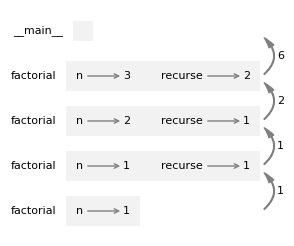

In [45]:
from diagram import diagram, adjust

width, height, x, y = [2.74, 2.26, 0.73, 2.05]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)
# adjust(x, y, bbox)

返回值沿着栈向上传递。在每个帧中，返回值是`n`与`recurse`的乘积。

在最后一帧中，不存在局部变量`recurse`，因为没有执行创建该变量的分支。

## 信仰之跃

跟随程序执行流程是阅读程序的一种方式，但大量的代码很快就会淹没你。我把另一种可选方式称为“信仰之跃”。当你调用函数时，你*假设*函数能够正确工作，返回正确的值，而不是查看完整的执行流程。

实际上，你在使用内建函数时已经练习了“信仰之跃”过程。当你调用`abs`或`math.sqrt`时，你并不检查这些函数的函数体，你只是假设它们有效。

当你调用自己的函数时同样也在练习该过程。例如，之前我们编写了`is_divisible`函数来判断一个数能否被另一个数整除。当我们确信这个函数正确，我们就会直接调用它，不再查看函数体。

对于递归函数依然如此。当你进行递归调用时，你不应该跟随程序的执行流，而应该假定递归调用有效，然后问自己，“如果我可以计算$n-1$的阶乘，我能够计算$n$的阶乘吗？”阶乘函数的递归定义表明你可以通过乘以$n$来计算。

当然，在你还没写完函数之前就假定函数正确有些奇怪，但这也是为什么它叫作“信仰之跃”！

## 斐波那契数列

除了`factorial`，最常见的递归函数是`fibonacci`，其定义如下：

$$\begin{aligned}
\mathrm{fibonacci}(0) &= 0 \\
\mathrm{fibonacci}(1) &= 1 \\
\mathrm{fibonacci}(n) &= \mathrm{fibonacci}(n-1) + \mathrm{fibonacci}(n-2)
\end{aligned}$$ 

将其转化为Python代码如下：

In [46]:
def fibonacci(n):
    if n == 0:
        return 0
    elif  n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

如果你想要跟随程序的执行流，即使是很小的$n$，你的脑袋也会爆炸。但是通过信仰之跃，如果你假定两个递归调用正确工作，你可以肯定最后的`return`结果正确。

顺带一提，这种计算斐波那契数列的方式效率很低。在[Chapter 10](chap10.ipynb)中，将解释为什么，以及一种推荐的改善方式。

## 类型检查

如果调用`factorial`并将`1.5`作为参数，会发生什么？

In [47]:
%%expect RecursionError

factorial(1.5)

RecursionError: maximum recursion depth exceeded in comparison

看起来发生了无限递归。为什么呢？函数有基准条件`n == 0` 和`n == 1`。但当`n`不是整数时，我们会*错过*基准条件，永远递归下去。

在这个例子里，初始的`n`为`1.5`，在第一次递归调用中，`n`为`0.5`，下一次递归调用中，`n`为`-0.5`。从此之后，`n`变得越来越小（负），但永远不会为`0`。

要避免无限递归，我们可以使用内建的`isinstance`函数检查参数的类型。以下是检查值是否为整数的例子：

In [48]:
isinstance(3, int)

True

In [49]:
isinstance(1.5, int)

False

现在新的`factorial`版本将进行错误检查。

In [53]:
def factorial(n):
    if not isinstance(n, int):
        print('factorial的参数n必须为整数。')
        return None
    elif n < 0:
        print('factorial的参数n必须为非负整数。')
        return None
    elif n == 0:
        return 1
    else:
        return n * factorial(n-1)

首先它检查`n`是否是整数，如果不是则显示错误信息并返回`None`。

In [51]:
factorial('crunchy frog')

factorial的参数n必须为整数。


然后检查`n`是否为负数。如果是负数，显示错误信息并返回`None`。

In [54]:
factorial(-2)

factorial的参数n必须为非负整数。


如果我们通过了两个检查，我们知道`n`是非负的整数。因此我们可以肯定递归能够结束。检查函数的参数，确保它们有正确的类型和值称为**输入验证input validation**。

## 调试

将大程序分解为小函数能够创建天然的调试检查点。如果函数无效，有3种可能的原因：

- 函数接受的参数错误，违反了前置条件；
- 函数有错误，违反了后置条件；
- 调用者对返回值做了错误操作。

对于第1种可能，你可以在函数开头添加`print`语句来显示参数的值（以及类型）。你也可以编写代码显式检查前置条件。

如果参数看起来没问题，你可以在每个`return`语句前添加`print`语句，显示返回值。如果条件允许，用更易于检查的参数调用函数。

在函数的开头和结尾添加`print`语句可以让执行流更明显。例如，以下是带有打印语句的`factorial`版本：

In [55]:
def factorial(n):
    space = ' ' * (4 * n)
    print(space, 'factorial', n)
    if n == 0:
        print(space, '返回 1')
        return 1
    else:
        recurse = factorial(n-1)
        result = n * recurse
        print(space, '返回', result)
        return result

`space`是控制输出缩进的字符串，由空格组成。以下是`factorial(3)`的结果：

In [56]:
factorial(3)

             factorial 3
         factorial 2
     factorial 1
 factorial 0
 返回 1
     返回 1
         返回 2
             返回 6


6

如果你对执行流感到困惑，这种输出可能更有帮助。开发高效的脚手架需要花一些实践，但一小点脚手架会节省很多的调试时间。

## 术语表


- **返回值return value**：函数的结果。如果函数调用作为表达式，则表达式的值就是返回值
- **纯函数pure function**：只会返回值，不显示任何东西或有其他影响的函数。
- **死代码dead code**：永远不会执行的代码部分，通常出现在`return`语句之后。
- **增量开发incremental development**：旨在避免调试的一种编程开发计划，一次添加并测试少量的代码。
- **脚手架scaffolding**：只在程序开发过程中使用的代码，不是最终版本代码的一部分。
- **图灵完备Turing complete**：一个语言，或者语言的子集，当它能够执行任何算法的计算时就是图灵完备的。
- **输入验证input validation**：检查函数的参数，确保它们有正确的类型和值

## 练习

In [57]:
# 这个单元格让Jupyter在出现运行时故障时提供更多调试信息。
# 在进行练习前先运行本单元格。

%xmode Verbose

Exception reporting mode: Verbose


### 询问虚拟助手

本章我们看到了一个可能不返回数值的错误函数：

In [58]:
def absolute_value_wrong(x):
    if x < 0:
        return -x
    if x > 0:
        return x

以及有死代码的函数：

In [59]:
def absolute_value_extra_return(x):
    if x < 0:
        return -x
    else:
        return x
    
    return 'This is dead code.'

以及一个正确但是不符合习惯的函数。

In [60]:
def is_divisible(x, y):
    if x % y == 0:
        return True
    else:
        return False

询问虚拟助手每个函数的问题，以及修改方案。

然后要求它“编写函数，接受两个点的坐标，计算它们之间的距离”。看看它提供的函数是否与本章我们编写的`distance`相似。

### 练习

使用增量开发方式，编写函数`hypot`，接受两条直角边的边长为参数，返回对应直角三角形的斜边长度。

注意`math.hypot`做相同的事，但你不应该使用它完成这个练习！

即使你能够一次性正确编写函数，从总是返回`0`的函数开始，练习做出小修改并测试的过程。当你完成时，函数应该只返回值，不应该显示任何信息。

### 练习

编写布尔函数`is_between(x, y, z)`，如果$x < y < z$返回`True`，否则返回`False`。

In [ ]:
# 在这编写

你可以用这些例子测试：

In [ ]:
is_between(1, 2, 3)  # True

In [ ]:
is_between(3, 2, 1)  # True

In [ ]:
is_between(1, 3, 2)  # False

In [ ]:
is_between(2, 3, 1)  # False

### 练习

阿克曼函数$A(m, n)$定义为：

$$\begin{aligned}
A(m, n) = \begin{cases} 
              n+1 & m = 0 \\ 
        A(m-1, 1) & m > 0,n = 0 \\ 
A(m-1, A(m, n-1)) & m > 0,n > 0.
\end{cases} 
\end{aligned}$$ 

编写函数`ackermann`计算阿克曼函数。如果调用`ackermann(5, 5)`会发生什么？

In [ ]:
# 在这编写

你可以使用以下示例进行测试：

In [ ]:
ackermann(3, 2)  # 29

In [ ]:
ackermann(3, 3)  # 61

In [ ]:
ackermann(3, 4)  # 125

如果你用超过4的值调用该函数，将导致`RecursionError`。

In [ ]:
%%expect RecursionError

ackermann(5, 5)

添加打印语句到函数的开头，显示参数的值，然后重新运行示例，检查为什么会这样。

### 练习

若数字$a$是$b$的幂(power)，则$a$可以被$b$整除，且$a/b$也可以被$b$整除。编写递归函数`is_power`，接受参数`a`与`b`，如果`a`是`b`的幂，则返回`True`，否则返回`False`。注意：必须考虑基准条件。

In [ ]:
# 在这编写

你可以使用以下示例进行测试：

In [ ]:
is_power(65536, 2)   # True

In [ ]:
is_power(27, 3)  # True

In [ ]:
is_power(24, 2)  # False

In [ ]:
is_power(1, 17)   # True

译注：$17^0==1$，考虑该特殊情况与练习中幂的判定方法，设置基准条件。

### 练习

$a$和$b$的最大公约数(GCD)是可以同时将它们整除的数的最大值。

一种求最大公约数的方法基于以下观察：如果$a$除以$b$的余数为$r$，那么$gcd(a,
b) = gcd(b, r)$。基准条件为$gcd(a, 0) = a$。

译注：也即辗转相除法。

编写函数`gcd`，接受参数`a`,`b`，返回最大公约数。

In [ ]:
# 在这编写

你可以使用以下示例进行测试：

In [ ]:
gcd(12, 8)    # 4

In [ ]:
gcd(13, 17)   # 1

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)